In [5]:
import xml.etree.ElementTree as ET
from collections import defaultdict
from google.colab import files
from graphviz import Digraph
import re
from IPython.display import Image, display

In [6]:
def get_namespace(element):
    m = re.match(r'\{.*\}', element.tag)
    return m.group(0) if m else ''

def get_task_info(root):
    task_info = defaultdict(dict)
    tasks = root.findall(".//{http://www.omg.org/spec/BPMN/20100524/MODEL}task")

    for task in tasks:
        task_id = task.attrib['id']
        task_info[task_id] = {"id": task_id}

    return task_info

def get_gateway_info(root, ns):
    gateway_info = defaultdict(dict)
    gateways = root.findall(".//{0}exclusiveGateway".format(get_namespace(root)))

    for gateway in gateways:
        gateway_id = gateway.attrib['id']
        gateway_info[gateway_id] = {"id": gateway_id}

    return gateway_info

def get_start_event_info(root, ns):
    start_event_info = defaultdict(dict)
    start_events = root.findall(".//{0}startEvent".format(ns))

    for start_event in start_events:
        start_event_id = start_event.attrib['id']
        start_event_info[start_event_id] = {"id": start_event_id}

    return start_event_info

def get_end_event_info(root, ns):
    end_event_info = defaultdict(dict)
    end_events = root.findall(".//{0}endEvent".format(ns))

    for end_event in end_events:
        end_event_id = end_event.attrib['id']
        end_event_info[end_event_id] = {"id": end_event_id}

    return end_event_info

def get_flow_info(root, ns):
    flow_info = defaultdict(dict)
    flows = root.findall(".//{0}sequenceFlow".format(ns))

    for flow in flows:
        flow_id = flow.attrib['id']
        source_id = flow.attrib['sourceRef']
        target_id = flow.attrib['targetRef']

        flow_info[flow_id]["sourceId"] = source_id
        flow_info[flow_id]["targetId"] = target_id

    return flow_info

def extract_bpmn_info(root):
    bpmn_info = {
        'tasks': {},
        'gateways': {},
        'start_events': {},
        'end_events': {},
        'flows': {}
    }

    ns = get_namespace(root)

    # Extract information for tasks
    tasks = root.findall(".//{0}task".format(ns), namespaces={'ns': ns})
    for task in tasks:
        task_id = task.get('id', '')
        task_name = task.get('name', '')
        bpmn_info['tasks'][task_id] = {'id': task_id, 'name': task_name}

    # Extract information for gateways
    gateways = root.findall(".//{0}exclusiveGateway".format(ns), namespaces={'ns': ns})
    for gateway in gateways:
        gateway_id = gateway.get('id', '')
        gateway_name = gateway.get('name', '')
        bpmn_info['gateways'][gateway_id] = {'id': gateway_id, 'name': gateway_name}

    # Extract information for start events
    start_events = root.findall(".//{0}startEvent".format(ns), namespaces={'ns': ns})
    for start_event in start_events:
        start_event_id = start_event.get('id', '')
        start_event_name = start_event.get('name', '')
        bpmn_info['start_events'][start_event_id] = {'id': start_event_id, 'name': start_event_name}

    # Extract information for end events
    end_events = root.findall(".//{0}endEvent".format(ns), namespaces={'ns': ns})
    for end_event in end_events:
        end_event_id = end_event.get('id', '')
        end_event_name = end_event.get('name', '')
        bpmn_info['end_events'][end_event_id] = {'id': end_event_id, 'name': end_event_name}

    # Extract information for flows
    flows = root.findall(".//{0}sequenceFlow".format(ns), namespaces={'ns': ns})
    for flow in flows:
        flow_id = flow.get('id', '')
        source_id = flow.get('sourceRef', '')
        target_id = flow.get('targetRef', '')
        bpmn_info['flows'][flow_id] = {'sourceId': source_id, 'targetId': target_id}

    return bpmn_info

def create_petri_net(bpmn_info):
    petri_net = Digraph('PetriNet', format='png', graph_attr={'size': '11,7', 'rankdir': 'LR'})  # Adjust size and rankdir

    # Add places and transitions based on BPMN info
    for task_id, task_data in bpmn_info['tasks'].items():
        attribute_value = task_data.get('name', task_id)
        petri_net.node(task_id, shape='box', color='black', label=attribute_value)

    for gateway_id, gateway_data in bpmn_info['gateways'].items():
        attribute_value = gateway_data.get('name', gateway_id)
        petri_net.node(gateway_id, shape='diamond', color='orange', style='filled', label=attribute_value)

    # Add start event without a circle
    for start_event_id, start_event_data in bpmn_info['start_events'].items():
        attribute_value = start_event_data.get('name', start_event_id)
        petri_net.node(start_event_id, shape='ellipse', color='green', style='filled', label=attribute_value)

    for end_event_id, end_event_data in bpmn_info['end_events'].items():
        attribute_value = end_event_data.get('name', end_event_id)
        petri_net.node(end_event_id, shape='ellipse', color='red', style='filled', label=attribute_value)

    # Add places between transitions (rectangles or diamonds) except before start and end events
    for flow_id, flow_data in bpmn_info['flows'].items():
        source_id = flow_data['sourceId']
        target_id = flow_data['targetId']

        # Check if the source or target is a start or end event
        if source_id not in bpmn_info['start_events'] and target_id not in bpmn_info['end_events']:
            # Add a place (circle) between transitions
            place_id = f"{source_id}_to_{target_id}_place"
            petri_net.node(place_id, shape='circle', color='black', label='')

            # Add edges from source to place and place to target
            petri_net.edge(source_id, place_id)
            petri_net.edge(place_id, target_id)
        else:
            # Add edge directly from source to target (without a place)
            petri_net.edge(source_id, target_id)

    return petri_net

Saving P2.xml to P2 (1).xml
Saving P3.xml to P3 (1).xml
Saving P4.xml to P4 (1).xml
Saving P5.xml to P5 (1).xml
Saving P6.xml to P6 (1).xml
Saving P7.xml to P7 (1).xml
Saving P8.xml to P8 (1).xml
Saving P9.xml to P9 (1).xml
Saving P10.xml to P10 (1).xml
Petri Net 1 for P2 (1).xml:


Petri Net 2 for P3 (1).xml:


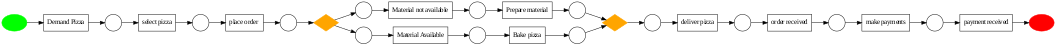

Petri Net 3 for P4 (1).xml:


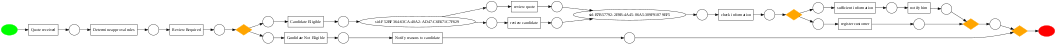

Petri Net 4 for P5 (1).xml:


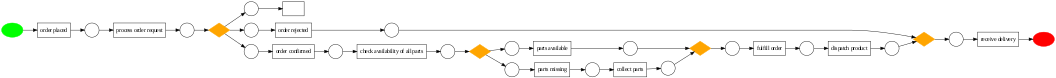

Petri Net 5 for P6 (1).xml:


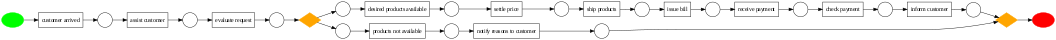

Petri Net 6 for P7 (1).xml:


Petri Net 7 for P8 (1).xml:


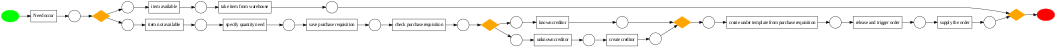

Petri Net 8 for P9 (1).xml:


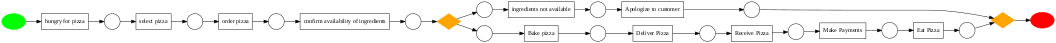

Petri Net 9 for P10 (1).xml:


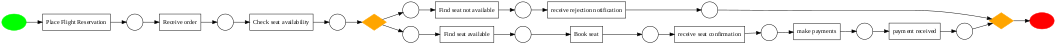

In [7]:
# Example usage:
uploaded = files.upload()

# Iterate through all uploaded files and maintain a counter
for i, (xml_filename, file_content) in enumerate(uploaded.items(), 1):
    # Parse the XML file
    tree = ET.ElementTree(ET.fromstring(file_content.decode('utf-8')))
    root = tree.getroot()

    # Extract BPMN information
    bpmn_info = extract_bpmn_info(root)

    # Create Petri net
    petri_net = create_petri_net(bpmn_info)

    # Save the Petri net as an image
    petri_net.render(filename=f'petri_net_{i}_{xml_filename}', format='png', cleanup=True)

    # Display the Petri net image with a label
    print(f"Petri Net {i} for {xml_filename}:")
    display(Image(filename=f'petri_net_{i}_{xml_filename}.png'))